In [1]:
from astroquery.mast import Observations
from astroquery.vizier import Vizier
from astropy.io import fits
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
#from astropy.stats.lombscargle import LombScargle
from gatspy import datasets, periodic
%matplotlib inline

from astropy import units as u
from astropy.timeseries import LombScargle
from astropy.timeseries import TimeSeries
from astropy.timeseries import BoxLeastSquares
from astropy.stats import sigma_clipped_stats
from astropy.timeseries import aggregate_downsample


In [3]:
misiones = Observations.list_missions()
print(misiones)

['BEFS', 'EUVE', 'FUSE', 'GALEX', 'HLA', 'HLSP', 'HST', 'HUT', 'IUE', 'JWST', 'K2', 'K2FFI', 'Kepler', 'KeplerFFI', 'PS1', 'SPITZER_SHA', 'SWIFT', 'TESS', 'TUES', 'WUPPE']


In [4]:
obs_data = Observations.query_criteria(obs_collection = 'TESS',
                                       dataproduct_type = ['timeseries'],
                                       sequence_number = 1)
#print(obs_data)

In [5]:
data_products = Observations.get_product_list(obs_data[0:5]) #Cantidad de datos a descargar (5 en este caso)
#print(data_products.colnames)

In [5]:
#data_products['obsID', 'productFilename', 'description']

In [6]:
lc_data = data_products['description'] == 'Light curves'  # Para descargar las curvas de luz
print(data_products[lc_data])

 obsID   obs_collection dataproduct_type ... parent_obsid dataRights calib_level
-------- -------------- ---------------- ... ------------ ---------- -----------
60844092           TESS       timeseries ...     60844092     PUBLIC           3
60844083           TESS       timeseries ...     60844083     PUBLIC           3
60844097           TESS       timeseries ...     60844097     PUBLIC           3
60844089           TESS       timeseries ...     60844089     PUBLIC           3
60844081           TESS       timeseries ...     60844081     PUBLIC           3


In [7]:
lc_data_descarga = Observations.download_products(data_products[lc_data])
print(lc_data_descarga)

                                                         Local Path                                                         ...
--------------------------------------------------------------------------------------------------------------------------- ...
./mastDownload/TESS/tess2018206045859-s0001-0000000088328317-0120-s/tess2018206045859-s0001-0000000088328317-0120-s_lc.fits ...
./mastDownload/TESS/tess2018206045859-s0001-0000000150359212-0120-s/tess2018206045859-s0001-0000000150359212-0120-s_lc.fits ...
./mastDownload/TESS/tess2018206045859-s0001-0000000215197039-0120-s/tess2018206045859-s0001-0000000215197039-0120-s_lc.fits ...
./mastDownload/TESS/tess2018206045859-s0001-0000000237322295-0120-s/tess2018206045859-s0001-0000000237322295-0120-s_lc.fits ...
./mastDownload/TESS/tess2018206045859-s0001-0000000382265353-0120-s/tess2018206045859-s0001-0000000382265353-0120-s_lc.fits ...


In [17]:
fits.info(lc_data_descarga['Local Path'][0])

Filename: ./mastDownload/TESS/tess2018206045859-s0001-0000000088328317-0120-s/tess2018206045859-s0001-0000000088328317-0120-s_lc.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      44   ()      
  1  LIGHTCURVE    1 BinTableHDU    167   20076R x 20C   [D, E, J, E, E, E, E, E, E, J, D, E, D, E, D, E, D, E, E, E]   
  2  APERTURE      1 ImageHDU        49   (11, 13)   int32   


# EXTRACCIÓN DE LA INFORMACIÓN DEL FICHERO FITS

In [8]:
data = 'tess2018206045859-s0001-0000000025155310-0120-s_lc.fits'
#data = lc_data_descarga['Local Path'][0] #Abrir los archivos descargados, el primero en este caso
hd_list = fits.open(data)
tb_data = hd_list[1].data
cols = hd_list[1].columns
ar_size = int(
    len(tb_data.field('TIME'))
                )

In [9]:
for i in range(0, ar_size):
    print(str(tb_data.field('TIME')[i])+' '
      + str(tb_data.field('PDCSAP_FLUX')[i])+' '
      + str(tb_data.field('PDCSAP_FLUX_ERR')[i])+' '
         )

1325.2952597688304 nan nan 
1325.2966486684504 9233.582 12.31405 
1325.2980375681282 9244.356 12.328287 
1325.2994264677468 9261.54 12.339831 
1325.3008153673668 9228.784 12.322871 
1325.3022042670445 9241.798 12.332719 
1325.3035931667214 9232.813 12.330336 
1325.3049820663414 9232.669 12.329928 
1325.3063709660191 9237.258 12.333 
1325.3077598656964 9224.575 12.332983 
1325.3091487653746 9240.852 12.337656 
1325.3105376650517 9246.83 12.341153 
1325.3119265647292 9261.332 12.347236 
1325.3133154644074 9259.354 12.3499155 
1325.3147043640852 9228.232 12.335399 
1325.3160932638207 9241.302 12.341942 
1325.3174821634984 9242.106 12.349638 
1325.3188710632348 9249.777 12.3552265 
1325.3202599629126 9242.029 12.349433 
1325.3216488626476 9213.087 12.337013 
1325.323037762384 9238.08 12.349274 
1325.3244266620618 9229.413 12.345597 
1325.3258155617968 9243.092 12.3544445 
1325.3272044615333 9259.194 12.367015 
1325.3285933612688 9262.681 12.367981 
1325.3299822610622 9233.7295 12.35182 
13

1325.9730432147921 9220.55 12.763948 
1325.9744321158664 9241.282 12.779781 
1325.9758210169418 9267.6 12.78291 
1325.9772099180745 9251.096 12.778961 
1325.9785988191484 9256.367 12.779818 
1325.9799877202818 9239.272 12.772376 
1325.9813766213565 9230.231 12.770756 
1325.9827655224885 9257.3 12.775076 
1325.9841544235637 9245.628 12.775605 
1325.9855433246967 9253.78 12.776544 
1325.9869322258292 9235.723 12.768102 
1325.9883211269046 9245.216 12.774063 
1325.9897100280368 9243.073 12.77515 
1325.9910989291693 9237.387 12.768719 
1325.9924878302445 9236.077 12.772205 
1325.9938767313774 9250.394 12.776961 
1325.9952656325104 9250.249 12.775655 
1325.9966545336429 9247.652 12.777574 
1325.9980434347763 9252.142 12.783751 
1325.999432335851 9238.336 12.770396 
1326.000821236983 9239.392 12.772707 
1326.0022101381164 9252.198 12.779592 
1326.0035990392494 9247.879 12.775858 
1326.0049879403814 9260.701 12.786136 
1326.0063768415148 9234.667 12.775699 
1326.0077657426477 9251.699 12.7809

1326.7966617162615 9226.471 12.734684 
1326.798050617686 9255.654 12.751715 
1326.7994395191672 9237.133 12.738544 
1326.8008284206494 9234.524 12.737349 
1326.8022173220738 9257.554 12.74704 
1326.8036062235565 9252.345 12.746892 
1326.8049951250384 9240.298 12.745176 
1326.80638402652 9231.273 12.738878 
1326.8077729279444 9234.968 12.741753 
1326.809161829426 9234.369 12.739558 
1326.8105507309074 9226.26 12.733133 
1326.8119396323902 9258.212 12.75151 
1326.813328533814 9251.646 12.7446995 
1326.8147174352953 9237.958 12.744101 
1326.816106336778 9254.876 12.753748 
1326.817495238202 9256.778 12.744256 
1326.818884139684 9240.964 12.739705 
1326.8202730411667 9230.837 12.742888 
1326.8216619426485 9247.422 12.744606 
1326.8230508440724 9236.639 12.737589 
1326.8244397455544 9220.263 12.730027 
1326.8258286470364 9254.801 12.746445 
1326.8272175485185 9233.236 12.734884 
1326.828606449942 9260.861 12.755118 
1326.829995351425 9239.099 12.741216 
1326.831384252907 9239.029 12.743404 

1327.6730585085697 9255.803 12.606774 
1327.6744474098773 9256.5205 12.604127 
1327.6758363111844 9248.546 12.601863 
1327.6772252125509 9238.923 12.601763 
1327.6786141138582 9254.537 12.605324 
1327.6800030151649 9255.688 12.604464 
1327.6813919164729 nan nan 
1327.6827808177804 9235.665 12.591364 
1327.6841697190878 9233.933 12.595324 
1327.685558620396 9239.628 12.601761 
1327.6869475217027 9248.813 12.601026 
1327.6883364230098 9242.509 12.59495 
1327.6897253243178 9236.204 12.5942 
1327.6911142256247 9241.3955 12.594798 
1327.692503126932 9253.402 12.605051 
1327.69389202824 9242.181 12.59668 
1327.695280929548 9256.291 12.60182 
1327.6966698308556 9276.882 12.612793 
1327.6980587321623 9241.003 12.5908785 
1327.6994476334703 9245.483 12.596948 
1327.7008365347779 9268.282 12.609135 
1327.7022254360263 9248.242 12.600123 
1327.7036143373343 9258.386 12.606403 
1327.705003238642 9256.816 12.600915 
1327.706392139949 9227.967 12.589245 
1327.707781041257 9265.306 12.6038265 
1327.7

1328.5647330435495 9228.091 12.512505 
1328.5661219445078 9249.62 12.527345 
1328.5675108454652 9253.312 12.524759 
1328.568899746424 9239.87 12.521877 
1328.570288647382 9251.95 12.5258255 
1328.5716775483397 9234.209 12.516758 
1328.5730664492985 9250.034 12.522258 
1328.5744553502573 9253.678 12.529614 
1328.5758442512154 9247.158 12.521837 
1328.5772331521734 9244.827 12.526696 
1328.5786220531318 9263.905 12.5324335 
1328.5800109540314 9273.21 12.541473 
1328.5813998549897 9263.702 12.53378 
1328.5827887559478 9250.688 12.524409 
1328.584177656906 9259.879 12.53292 
1328.5855665578642 9246.3125 12.525221 
1328.586955458823 9255.734 12.532528 
1328.588344359723 9261.856 12.533965 
1328.5897332606805 9244.544 12.53232 
1328.5911221616393 9242.876 12.523084 
1328.592511062598 9259.803 12.53738 
1328.5938999634973 9253.953 12.53397 
1328.5952888644554 9238.684 12.528607 
1328.5966777654144 9269.899 12.54161 
1328.5980666663722 9253.839 12.534248 
1328.5994555672723 9254.101 12.534381 

1329.3314073208871 9245.605 12.479422 
1329.3327962237952 9237.342 12.478542 
1329.3341851267614 9269.293 12.498337 
1329.3355740296693 9259.833 12.491148 
1329.3369629326355 9252.406 12.487703 
1329.3383518355429 9253.743 12.485764 
1329.339740738451 9239.221 12.478403 
1329.3411296414176 9248.07 12.488633 
1329.3425185443257 9237.416 12.484441 
1329.343907447233 9280.734 12.503034 
1329.345296350199 9232.701 12.478422 
1329.3466852531078 9225.589 12.471532 
1329.3480741560152 9250.02 12.486505 
1329.3494630589805 9248.37 12.484657 
1329.350851961889 9267.606 12.488719 
1329.352240864797 9241.449 12.479164 
1329.3536297677626 9250.739 12.482357 
1329.3550186706707 9247.106 12.478804 
1329.3564075735792 9247.451 12.483212 
1329.3577964764872 9246.139 12.481635 
1329.3591853793946 9271.206 12.493948 
1329.3605742823606 9255.623 12.4868555 
1329.3619631852687 9246.583 12.482752 
1329.3633520881767 9242.728 12.473976 
1329.3647409910845 9263.554 12.49424 
1329.366129893992 9262.679 12.486

1329.9855805200766 9228.284 12.473017 
1329.986969422693 9236.359 12.469264 
1329.9883583252522 nan nan 
1329.989747227811 9244.522 12.477724 
1329.9911361304273 9252.896 12.4840145 
1329.9925250329861 nan nan 
1329.9939139355454 nan nan 
1329.9953028381042 nan nan 
1329.9966917407205 nan nan 
1329.998080643279 nan nan 
1329.9994695458379 nan nan 
1330.0008584483967 9265.556 12.486791 
1330.0022473509553 nan nan 
1330.0036362535716 nan nan 
1330.0050251561302 nan nan 
1330.0064140586896 nan nan 
1330.0078029612482 nan nan 
1330.0091918638063 nan nan 
1330.0105807663651 nan nan 
1330.0119696689244 9240.247 12.473048 
1330.0133585714825 9256.801 12.47867 
1330.0147474740988 9264.416 12.477168 
1330.0161363766583 9241.406 12.474681 
1330.017525279217 9255.794 12.473805 
1330.018914181775 nan nan 
1330.0203030843336 9252.156 12.478332 
1330.021691986893 9244.388 12.4744005 
1330.0230808894516 9264.722 12.483367 
1330.0244697920098 9240.34 12.47265 
1330.0258586945686 9242.144 12.467096 
13

1330.7994772936042 9171.092 12.442901 
1330.8008661956965 9179.169 12.445494 
1330.8022550977896 9201.854 12.459467 
1330.8036439998828 9163.715 12.445972 
1330.8050329019757 9180.782 12.448847 
1330.8064218040688 9191.419 12.457821 
1330.8078107062202 9165.965 12.443672 
1330.809199608313 9195.394 12.460812 
1330.8105885104062 9179.709 12.456822 
1330.8119774124993 9184.995 12.456734 
1330.8133663145916 9195.437 12.458216 
1330.8147552166847 9197.46 12.46178 
1330.8161441187785 9202.1875 12.459509 
1330.8175330208708 9171.565 12.44504 
1330.8189219229632 9192.591 12.458408 
1330.8203108250568 9204.822 12.4623785 
1330.8216997271506 9182.222 12.450554 
1330.823088629243 9178.345 12.447034 
1330.8244775313356 9179.92 12.453774 
1330.8258664334292 9174.137 12.45329 
1330.8272553355223 9190.318 12.46086 
1330.8286442376148 9168.448 12.4478855 
1330.8300331396495 9188.882 12.454545 
1330.8314220417433 9188.824 12.454974 
1330.8328109438362 9160.355 12.442512 
1330.8341998459287 9205.921 12

1331.6008736656386 9243.27 12.467368 
1331.6022625672085 9233.985 12.461941 
1331.6036514688358 9228.742 12.45479 
1331.6050403704626 9248.986 12.470313 
1331.6064292720316 9232.988 12.456097 
1331.6078181736598 9248.283 12.470978 
1331.6092070752284 9251.623 12.467897 
1331.610595976855 9253.465 12.468389 
1331.611984878425 9230.561 12.461506 
1331.6133737800524 9256.447 12.471094 
1331.6147626816207 9250.581 12.471038 
1331.6161515832482 9259.266 12.471287 
1331.6175404848182 9242.782 12.468367 
1331.6189293864454 9243.189 12.462516 
1331.620318288014 9251.479 12.470741 
1331.6217071896413 9240.486 12.4608 
1331.6230960912105 9266.363 12.470152 
1331.624484992838 9247.343 12.469908 
1331.625873894407 9259.459 12.470242 
1331.6272627959763 9248.223 12.471652 
1331.6286516976038 nan nan 
1331.6300405991728 9244.423 12.468572 
1331.6314295007421 9261.202 12.476259 
1331.6328184023687 9228.209 12.466879 
1331.634207303938 9240.473 12.472705 
1331.635596205508 9251.253 12.478234 
1331.636

1332.3244912801865 9257.244 12.45583 
1332.3258801812894 9245.833 12.447077 
1332.3272690824517 9231.486 12.445435 
1332.3286579835553 9245.743 12.453715 
1332.3300468847165 nan nan 
1332.3314357858198 nan nan 
1332.3328246869823 9245.012 12.450477 
1332.3342135880857 9252.961 12.449338 
1332.3356024891887 9255.158 12.446532 
1332.3369913903502 nan nan 
1332.3383802914539 9239.382 12.441927 
1332.3397691925575 9265.487 12.453646 
1332.341158093719 9225.355 12.436947 
1332.3425469948227 9261.91 12.459402 
1332.3439358959263 9217.274 12.432286 
1332.3453247970297 9251.938 12.451139 
1332.3467136981915 9238.459 12.446353 
1332.3481025992942 9253.693 12.452549 
1332.3494915003978 9244.517 12.440561 
1332.350880401502 9249.754 12.447352 
1332.3522693026057 9233.498 12.436738 
1332.3536582037666 9252.7295 12.450569 
1332.3550471048702 9246.113 12.443058 
1332.3564360059745 9246.643 12.443667 
1332.3578249070772 9226.638 12.432799 
1332.3592138081801 9241.186 12.444864 
1332.3606027092842 925

1333.1272759741623 9246.191 12.431577 
1333.1286648746836 9259.741 12.437061 
1333.1300537752627 9238.947 12.424465 
1333.1314426758422 9249.203 12.436613 
1333.1328315764226 9245.72 12.434617 
1333.1342204770024 9240.123 12.43058 
1333.135609377523 9241.848 12.429595 
1333.1369982781027 9228.738 12.426307 
1333.138387178683 9245.842 12.432522 
1333.139776079262 9253.53 12.434894 
1333.1411649797828 9244.051 12.428028 
1333.1425538803633 9244.001 12.430884 
1333.1439427809428 9254.292 12.43685 
1333.1453316814636 9276.535 12.447512 
1333.1467205820431 9257.978 12.438464 
1333.1481094825654 9237.418 12.422972 
1333.149498383145 9257.129 12.44629 
1333.150887283724 9254.089 12.437227 
1333.1522761842455 9226.99 12.422031 
1333.1536650848252 9249.357 12.432583 
1333.1550539853465 9245.553 12.432342 
1333.1564428859263 9259.862 12.441001 
1333.1578317864478 9233.738 12.428334 
1333.1592206870273 9236.616 12.426448 
1333.1606095875488 9258.049 12.439912 
1333.1619984881286 9247.492 12.43525

1333.7578345133807 9234.815 12.420174 
1333.7592234075819 9240.838 12.419265 
1333.7606123017824 9254.931 12.429309 
1333.7620011959261 9240.045 12.422477 
1333.7633900901271 9273.027 12.436347 
1333.7647789843281 9259.652 12.430358 
1333.76616787853 9251.213 12.422994 
1333.7675567726724 9277.549 12.43898 
1333.7689456668736 9252.758 12.428424 
1333.770334561017 9257.065 12.427424 
1333.7717234552183 9267.217 12.43539 
1333.7731123494193 9252.885 12.420105 
1333.7745012435623 9248.366 12.42255 
1333.7758901377642 9249.711 12.422222 
1333.777279031907 9265.808 12.427847 
1333.7786679261076 9256.295 12.429877 
1333.780056820251 9257.042 12.423847 
1333.781445714453 9255.429 12.42745 
1333.7828346085953 9253.769 12.41958 
1333.7842235027963 9250.991 12.427323 
1333.78561239694 9264.967 12.431858 
1333.7870012910828 9265.183 12.434166 
1333.788390185284 9224.541 12.407498 
1333.7897790794268 9249.55 12.423937 
1333.7911679735705 9252.369 12.419958 
1333.7925568677715 9233.041 12.41839 
13

1334.6453376732275 9235.878 12.41444 
1334.646726566672 9267.418 12.430813 
1334.6481154601745 9242.884 12.4181385 
1334.6495043536188 9252.353 12.429952 
1334.650893247064 9253.409 12.424202 
1334.6522821405667 9251.698 12.429844 
1334.653671034011 9250.323 12.426574 
1334.6550599274563 9256.71 12.427855 
1334.6564488209 9255.955 12.426024 
1334.6578377144026 9246.571 12.42118 
1334.6592266078478 9257.018 12.419733 
1334.6606155012923 9243.657 12.41794 
1334.6620043947366 9239.688 12.419632 
1334.663393288181 9237.928 12.418265 
1334.6647821816262 9260.78 12.42997 
1334.6661710750707 9263.22 12.427887 
1334.6675599685145 9232.782 12.414854 
1334.6689488619595 9248.449 12.425949 
1334.6703377554045 9240.711 12.415899 
1334.6717266488483 9264.873 12.432455 
1334.6731155422929 9243.993 12.423479 
1334.674504435738 9244.643 12.424802 
1334.6758933291824 9250.185 12.423162 
1334.6772822226267 9248.165 12.421622 
1334.6786711160712 9251.379 12.42664 
1334.6800600095164 nan nan 
1334.6814489

1335.505062489851 9251.914 12.317635 
1335.5064513824814 9239.183 12.309024 
1335.5078402752272 9237.262 12.307508 
1335.5092291678568 9227.209 12.30927 
1335.5106180604862 9265.24 12.323721 
1335.5120069532322 9227.353 12.302692 
1335.5133958458619 9239.032 12.313884 
1335.5147847384912 9259.938 12.3244505 
1335.516173631238 9244.09 12.311744 
1335.517562523868 9251.02 12.312955 
1335.518951416497 9237.216 12.313383 
1335.5203403092428 9259.976 12.319552 
1335.521729201873 9257.489 12.31514 
1335.523118094502 9260.33 12.32252 
1335.5245069871314 9249.624 12.31641 
1335.5258958798781 9255.802 12.316962 
1335.5272847725078 9252.138 12.317677 
1335.5286736651371 9255.66 12.316954 
1335.5300625577668 9242.14 12.312296 
1335.531451450397 9229.472 12.307282 
1335.5328403430265 9244.208 12.315825 
1335.5342292357718 9237.177 12.308109 
1335.535618128402 9267.66 12.324298 
1335.5370070210322 9263.787 12.3254 
1335.5383959136611 9248.881 12.313518 
1335.5397848062905 9246.989 12.309957 
1335.5

1336.3161755640278 9236.88 12.288892 
1336.3175644558432 9243.495 12.291932 
1336.3189533476577 9257.912 12.298069 
1336.3203422394724 9254.919 12.304637 
1336.3217311311705 9228.881 12.287014 
1336.3231200229852 9249.278 12.298928 
1336.3245089148 9247.712 12.295783 
1336.3258978066144 9248.688 12.291755 
1336.3272866984298 9243.713 12.293454 
1336.3286755901281 9253.986 12.301104 
1336.330064481942 9268.026 12.309662 
1336.331453373757 9231.15 12.287574 
1336.3328422655725 9233.737 12.291575 
1336.3342311572708 9249.404 12.291832 
1336.3356200490853 9237.431 12.2938175 
1336.3370089409 9246.161 12.296455 
1336.3383978325983 9242.583 12.291835 
1336.3397867244128 9248.906 12.302713 
1336.341175616111 9264.793 12.303584 
1336.3425645079265 9235.622 12.289392 
1336.343953399741 9234.558 12.290166 
1336.3453422914392 9236.792 12.290887 
1336.3467311832546 9246.967 12.29902 
1336.348120074952 9256.605 12.296568 
1336.3495089667667 9228.633 12.286386 
1336.3508978584655 9256.383 12.302555 

1337.1495122624315 9251.797 12.300391 
1337.1509011567039 9249.157 12.292006 
1337.1522900510927 9258.194 12.303655 
1337.1536789453655 9229.748 12.281555 
1337.155067839638 9256.636 12.302051 
1337.1564567340258 9248.529 12.297639 
1337.1578456282987 9257.022 12.302817 
1337.1592345225718 9265.042 12.29907 
1337.1606234168435 9263.949 12.302291 
1337.1620123111156 9252.977 12.290554 
1337.1634012055051 9231.291 12.28418 
1337.1647900997773 9252.682 12.300309 
1337.1661789940495 9244.373 12.294403 
1337.1675678883219 9271.121 12.30808 
1337.1689567825947 9237.461 12.295166 
1337.170345676867 9256.563 12.296896 
1337.1717345711386 9242.136 12.292881 
1337.1731234654117 9244.933 12.298565 
1337.1745123596838 9250.665 12.297759 
1337.1759012539555 9252.968 12.301564 
1337.1772901482286 9248.588 12.295732 
1337.1786790425015 9238.622 12.290902 
1337.180067936773 9248.05 12.294866 
1337.1814568310454 9255.723 12.297858 
1337.1828457253182 9249.56 12.300657 
1337.18423461959 9233.204 12.2848

1338.0550708660776 9253.272 12.305847 
1338.0564597588364 9262.215 12.309958 
1338.057848651596 9241.568 12.295569 
1338.0592375443548 9264.819 12.308614 
1338.0606264371131 9239.403 12.294161 
1338.0620153298728 9250.998 12.301322 
1338.0634042225151 9270.488 12.314603 
1338.0647931152735 9245.793 12.2982025 
1338.066182008033 9271.612 12.31842 
1338.0675709007924 9250.088 12.303057 
1338.0689597935507 9226.493 12.294359 
1338.070348686193 9244.227 12.300883 
1338.0717375789527 9234.144 12.293125 
1338.073126471711 9230.441 12.291358 
1338.0745153643534 9228.046 12.288481 
1338.075904257113 9235.238 12.291111 
1338.0772931498718 9253.169 12.306453 
1338.0786820425142 9266.266 12.310646 
1338.0800709352732 9229.696 12.298095 
1338.0814598279158 9268.338 12.307787 
1338.0828487206752 9254.943 12.304888 
1338.0842376133178 9261.306 12.306091 
1338.0856265060759 9247.683 12.296522 
1338.087015398719 9264.422 12.30964 
1338.088404291478 9229.912 12.293832 
1338.0897931841196 9238.787 12.29

nan nan nan 
nan nan nan 
nan nan nan 
nan nan nan 
nan nan nan 
nan nan nan 
nan nan nan 
nan nan nan 
nan nan nan 
nan nan nan 
nan nan nan 
nan nan nan 
nan nan nan 
nan nan nan 
nan nan nan 
nan nan nan 
nan nan nan 
nan nan nan 
nan nan nan 
nan nan nan 
nan nan nan 
nan nan nan 
nan nan nan 
nan nan nan 
nan nan nan 
nan nan nan 
nan nan nan 
nan nan nan 
nan nan nan 
nan nan nan 
nan nan nan 
nan nan nan 
nan nan nan 
nan nan nan 
nan nan nan 
nan nan nan 
nan nan nan 
nan nan nan 
nan nan nan 
nan nan nan 
nan nan nan 
nan nan nan 
nan nan nan 
nan nan nan 
nan nan nan 
nan nan nan 
nan nan nan 
nan nan nan 
nan nan nan 
nan nan nan 
nan nan nan 
nan nan nan 
nan nan nan 
nan nan nan 
nan nan nan 
nan nan nan 
nan nan nan 
nan nan nan 
nan nan nan 
nan nan nan 
nan nan nan 
nan nan nan 
nan nan nan 
nan nan nan 
nan nan nan 
nan nan nan 
nan nan nan 
nan nan nan 
nan nan nan 
nan nan nan 
nan nan nan 
nan nan nan 
nan nan nan 
nan nan nan 
nan nan nan 
nan nan nan 
nan nan nan 

1339.6939639280715 9251.442 12.292921 
1339.6953528220051 9240.199 12.288572 
1339.696741715939 9269.423 12.301087 
1339.6981306099883 9249.244 12.289805 
1339.6995195039208 9252.538 12.292037 
1339.7009083978537 9243.735 12.288402 
1339.7022972917875 9269.434 12.303466 
1339.703686185837 9258.773 12.294577 
1339.70507507977 9237.416 12.284968 
1339.7064639737036 9253.49 12.298828 
1339.7078528677525 9270.549 12.300621 
1339.709241761685 9232.591 12.286032 
1339.710630655735 9246.415 12.294244 
1339.712019549785 9249.375 12.290611 
1339.7134084437182 9231.911 12.280351 
1339.7147973377669 9228.891 12.284188 
1339.7161862317 9271.698 12.306688 
1339.71757512575 9253.673 12.294906 
1339.7189640197996 9233.494 12.286422 
1339.7203529138492 9251.558 12.293098 
1339.7217418078985 9252.566 12.292006 
1339.723130701831 9237.903 12.28424 
1339.7245195958803 9234.178 12.282569 
1339.7259084899306 9262.344 12.301477 
1339.7272973839806 9227.57 12.282678 
1339.7286862780293 9252.797 12.299564 
13

1340.5689677557446 9240.167 12.637171 
1340.570356651423 9247.496 12.648326 
1340.5717455469853 9260.566 12.652363 
1340.573134442549 9253.626 12.646036 
1340.5745233382288 9254.955 12.646769 
1340.5759122337918 9244.627 12.637991 
1340.5773011294702 9256.36 12.64784 
1340.5786900250332 9243.177 12.640044 
1340.580078920596 9244.218 12.640822 
1340.581467816275 9221.152 12.625921 
1340.5828567118388 9249.6455 12.641385 
1340.5842456074015 9249.311 12.641614 
1340.5856345030802 9249.817 12.637073 
1340.587023398643 9241.003 12.635189 
1340.588412294323 9248.057 12.635847 
1340.5898011898864 9257.763 12.642955 
1340.591190085565 9247.667 12.637748 
1340.5925789811272 nan nan 
1340.5939678768073 9242.633 12.636475 
1340.59535677237 9235.347 12.634722 
1340.5967456680492 9239.8 12.626989 
1340.5981345636121 9234.97 12.625389 
1340.5995234592915 9237.509 12.62984 
1340.6009123548542 9230.411 12.624088 
1340.6023012505334 9245.156 12.633969 
1340.603690146097 9269.93 12.644657 
1340.60507904

1341.4703611062175 9247.531 12.56303 
1341.4717500020133 9262.011 12.563051 
1341.473138897809 9257.048 12.557556 
1341.4745277936054 9260.419 12.56845 
1341.4759166895174 9269.014 12.570331 
1341.4773055853125 9258.912 12.564809 
1341.478694481108 9259.412 12.5662985 
1341.4800833769045 9261.415 12.564745 
1341.4814722727008 9246.587 12.563491 
1341.4828611684957 9244.022 12.55855 
1341.4842500642908 9248.3955 12.567824 
1341.4856389600873 9238.042 12.558734 
1341.4870278558835 9254.126 12.563425 
1341.4884167516793 9252.4 12.567813 
1341.4898056474742 9260.972 12.5716305 
1341.49119454327 9239.913 12.553759 
1341.4925834390656 9265.515 12.5706415 
1341.4939723348612 9235.914 12.555735 
1341.4953612306576 9244.426 12.559874 
1341.4967501264541 9258.724 12.565895 
1341.4981390222488 9238.776 12.564375 
1341.499527918044 9267.899 12.572853 
1341.5009168138404 9241.929 12.5640135 
1341.5023057096366 9244.265 12.559526 
1341.5036946054324 9241.421 12.560729 
1341.5050835012273 9227.835 12

1342.1453644279036 9230.291 12.470696 
1342.1467533235827 9282.413 12.510882 
1342.148142219145 9260.781 12.496719 
1342.1495311148242 9224.297 12.477405 
1342.1509200103878 9233.348 12.479901 
1342.152308906067 9234.378 12.475171 
1342.1536978016297 9241.322 12.484754 
1342.1550866973091 9235.681 12.477794 
1342.156475592872 9235.624 12.483956 
1342.1578644885512 9243.931 12.483133 
1342.159253384114 9241.56 12.484516 
1342.160642279794 9257.11 12.499204 
1342.1620311753568 9241.538 12.484799 
1342.1634200710355 9268.294 12.50253 
1342.1648089665982 9268.503 12.4759035 
1342.1661978622783 9251.685 12.494482 
1342.167586757841 9263.582 12.493475 
1342.168975653404 9256.917 12.49457 
1342.1703645490834 9231.054 12.467228 
1342.1717534446461 9242.716 12.484918 
1342.1731423403253 9232.57 12.480905 
1342.1745312358883 9242.488 12.483293 
1342.175920131568 9231.302 12.474245 
1342.1773090271308 9240.293 12.483946 
1342.1786979226931 9241.21 12.486809 
1342.1800868183723 9258.116 12.490842 

1343.0342575425195 9259.751 12.444306 
1343.0356464379793 9255.775 12.444854 
1343.0370353333233 9234.092 12.439386 
1343.0384242286673 9235.557 12.430638 
1343.0398131240106 9247.031 12.443995 
1343.041202019354 9244.443 12.438512 
1343.0425909146986 9254.713 12.441801 
1343.0439798100433 9271.087 12.4575615 
1343.0453687053864 9234.929 12.433989 
1343.0467576007297 9241.714 12.43617 
1343.0481464960737 9240.363 12.44049 
1343.0495353915342 9253.8545 12.437379 
1343.0509242868775 9243.9375 12.436287 
1343.0523131822215 9257.741 12.443984 
1343.0537020775662 9253.027 12.447219 
1343.0550909729102 9246.381 12.442906 
1343.0564798682535 9245.082 12.442203 
1343.0578687635968 9245.916 12.442268 
1343.0592576589409 9256.746 12.450351 
1343.0606465542846 9267.088 12.450334 
1343.0620354496286 9246.613 12.446712 
1343.0634243449726 9241.431 12.434775 
1343.0648132403167 9239.896 12.437962 
1343.06620213566 9249.247 12.439992 
1343.0675910310033 9245.073 12.443563 
1343.0689799263473 9266.387

1343.9481505297417 9188.749 12.419216 
1343.94953942462 9172.857 12.416737 
1343.9509283194984 9189.837 12.4178295 
1343.9523172142603 9174.739 12.406372 
1343.953706109138 9181.329 12.40834 
1343.9550950040157 9184.127 12.416429 
1343.956483898894 9169.786 12.408121 
1343.9578727937728 9198.03 12.418291 
1343.9592616886512 9200.442 12.419464 
1343.9606505834124 9202.819 12.414396 
1343.9620394782908 9175.011 12.413522 
1343.963428373169 9164.644 12.401013 
1343.9648172680468 nan nan 
1343.9662061629244 9194.168 12.4019165 
1343.967595057687 9157.146 12.399845 
1343.968983952566 9176.396 12.399395 
1343.9703728474437 9170.892 12.405654 
1343.9717617423214 9170.378 12.400837 
1343.973150637083 9165.941 12.397393 
1343.9745395319615 9170.881 12.400239 
1343.9759284268391 9179.4795 12.4082985 
1343.9773173217168 9183.359 12.404382 
1343.9787062164794 9190.161 12.406366 
1343.9800951113584 9184.245 12.402343 
1343.981484006236 9174.363 12.401763 
1343.9828729011138 9183.2 12.4061165 
1343.

1344.816209658861 9223.918 12.436401 
1344.8175985532737 9245.365 12.444721 
1344.8189874475693 9242.958 12.443309 
1344.8203763419813 9245.5 12.447047 
1344.8217652362775 9249.646 12.450199 
1344.8231541305745 9256.391 12.451019 
1344.8245430249872 9237.829 12.44454 
1344.8259319192825 9256.621 12.451379 
1344.8273208135788 9248.176 12.452704 
1344.8287097079915 9236.16 12.446086 
1344.830098602287 9247.707 12.450264 
1344.8314874965827 9245.064 12.446038 
1344.8328763909954 9251.171 12.453065 
1344.8342652852923 9261.78 12.454794 
1344.8356541795886 9249.675 12.451465 
1344.8370430740006 9267.722 12.460449 
1344.8384319682968 9239.31 12.443192 
1344.8398208625931 9254.231 12.4502535 
1344.841209757005 9250.514 12.450367 
1344.8425986513005 9223.207 12.436354 
1344.8439875455974 9246.469 12.448457 
1344.8453764398944 9254.726 12.45192 
1344.8467653343064 9247.623 12.452632 
1344.848154228602 9274.756 12.461097 
1344.8495431228982 9261.752 12.459004 
1344.8509320171945 9242.927 12.4426

1345.6676017342334 9231.412 12.438472 
1345.6689906280822 9258.09 12.459204 
1345.6703795218154 9251.73 12.456467 
1345.6717684156642 9262.384 12.456749 
1345.6731573095126 9263.201 12.45632 
1345.6745462032459 9246.643 12.44799 
1345.6759350970951 9253.378 12.44863 
1345.677323990944 9224.768 12.437457 
1345.6787128846768 9234.187 12.445171 
1345.680101778526 9254.368 12.453568 
1345.681490672375 9262.527 12.460923 
1345.6828795661077 9259.575 12.453847 
1345.6842684599565 9241.138 12.447864 
1345.6856573536893 9232.798 12.444476 
1345.687046247539 9229.725 12.442009 
1345.6884351413883 9251.696 12.453623 
1345.6898240351204 9258.222 12.455536 
1345.6912129289694 9274.282 12.463245 
1345.6926018227032 9242.424 12.444106 
1345.6939907165515 9253.317 12.451884 
1345.6953796104003 9234.675 12.440442 
1345.6967685041336 9236.274 12.445555 
1345.6981573979829 9258.127 12.452974 
1345.6995462917148 9244.636 12.448253 
1345.700935185564 9262.923 12.460535 
1345.702324079297 9254.737 12.45598

1346.5648269437656 9247.19 12.440954 
1346.5662158370337 9232.289 12.4250555 
1346.5676047301843 9239.142 12.43319 
1346.5689936234508 9236.526 12.42901 
1346.5703825166015 9237.241 12.429954 
1346.5717714097523 9261.369 12.447465 
1346.5731603030194 9244.195 12.433871 
1346.57454919617 9238.494 12.433694 
1346.5759380894365 9264.448 12.446221 
1346.5773269825872 9247.407 12.440742 
1346.5787158757385 9238.115 12.443667 
1346.5801047690056 9244.813 12.440969 
1346.581493662156 9239.227 12.441628 
1346.5828825553067 9262.289 12.449579 
1346.5842714485743 9269.74 12.45035 
1346.5856603417242 9259.201 12.451632 
1346.587049234991 9265.039 12.454242 
1346.5884381281421 9253.309 12.44679 
1346.5898270212929 9258.243 12.447527 
1346.591215914443 9227.967 12.437239 
1346.59260480771 9253.307 12.450883 
1346.5939937008607 9262.577 12.447232 
1346.5953825940114 9239.849 12.439995 
1346.5967714872786 9235.955 12.441951 
1346.598160380429 9253.865 12.452261 
1346.5995492735797 9236.375 12.434366 

1347.4731628826657 nan nan 
1347.4745517751999 nan nan 
1347.4759406676176 nan nan 
1347.4773295601512 9230.472 12.398093 
1347.478718452684 9228.843 12.397989 
1347.4801073452181 nan nan 
1347.4814962376358 nan nan 
1347.48288513017 nan nan 
1347.4842740227032 nan nan 
1347.4856629151204 nan nan 
1347.4870518076546 nan nan 
1347.4884407001882 9235.361 12.38228 
1347.489829592605 nan nan 
1347.4912184851387 nan nan 
1347.4926073776728 nan nan 
1347.4939962700905 nan nan 
1347.4953851626237 nan nan 
1347.4967740551574 9231.788 12.389974 
1347.4981629475742 9240.832 12.377836 
1347.4995518401086 nan nan 
1347.5009407325256 nan nan 
1347.5023296250592 9244.679 12.36944 
1347.5037185175934 9231.159 12.380056 
1347.5051074100102 nan nan 
1347.5064963025438 nan nan 
1347.5078851949606 9250.614 12.39207 
1347.5092740874948 nan nan 
1347.5106629799125 9226.719 12.369619 
1347.5120518724461 9236.727 12.371338 
1347.5134407648634 nan nan 
1347.5148296573966 9248.471 12.389729 
1347.5162185499307

1348.370387217415 9256.982 12.375681 
1348.3717761092494 nan nan 
1348.373165001085 nan nan 
1348.3745538928042 9243.018 12.381312 
1348.3759427846394 9241.535 12.38088 
1348.3773316764741 nan nan 
1348.3787205681933 9249.206 12.370389 
1348.380109460029 nan nan 
1348.3814983518632 9262.618 12.361101 
1348.382887243582 9232.431 12.361154 
1348.3842761354176 9238.136 12.377834 
1348.3856650271368 9260.274 12.3728075 
1348.387053918972 9247.374 12.371601 
1348.3884428108063 9232.743 12.383175 
1348.3898317025255 9267.12 12.387867 
1348.3912205943611 9223.587 12.374832 
1348.3926094860794 9237.638 12.384644 
1348.3939983779146 9251.263 12.381826 
1348.3953872696338 9230.777 12.372603 
1348.3967761614695 9247.473 12.390508 
1348.398165053188 9263.719 12.387215 
1348.399553945023 9225.544 12.37726 
1348.4009428367417 9262.131 12.396822 
1348.4023317285773 9227.294 12.370812 
1348.4037206202966 9230.578 12.36932 
1348.4051095121313 9249.4375 12.383551 
1348.40649840385 9248.683 12.389555 
13

1349.2787222003485 nan nan 
1349.2801110913692 nan nan 
1349.2814999823886 nan nan 
1349.2828888734089 nan nan 
1349.2842777644296 nan nan 
1349.2856666554503 nan nan 
1349.2870555464706 nan nan 
1349.288444437374 nan nan 
1349.2898333283947 nan nan 
1349.291222219415 nan nan 
1349.2926111104348 nan nan 
1349.2940000013386 nan nan 
1349.2953888923594 nan nan 
1349.29677778338 nan nan 
1349.2981666744004 nan nan 
1349.2995555653038 9255.091 12.365874 
1349.300944456324 9238.582 12.385031 
1349.3023333473448 nan nan 
1349.3037222383646 9241.66 12.379832 
1349.3051111292684 nan nan 
1349.3065000202891 9263.03 12.3947735 
1349.3078889113092 9254.71 12.385577 
1349.3092778022128 9266.441 12.387596 
1349.310666693233 9238.466 12.3874445 
1349.3120555841374 9269.435 12.384903 
1349.3134444751581 nan nan 
1349.3148333661788 9246.464 12.3680105 
1349.3162222570822 9219.972 12.386662 
1349.3176111481016 9241.546 12.393667 
1349.319000039006 9254.546 12.401631 
1349.3203889300269 9251.281 12.4064

1350.1759455082024 9244.073 12.3199005 
1350.1773343982918 9258.937 12.322962 
1350.1787232884978 9224.108 12.306918 
1350.1801121785875 9239.526 12.311665 
1350.181501068676 9251.67 12.318946 
1350.182889958765 9235.929 12.306962 
1350.1842788488534 9245.899 12.316492 
1350.1856677389428 9253.734 12.319738 
1350.1870566290318 9231.113 12.308481 
1350.1884455191203 9257.902 12.317757 
1350.1898344092097 9244.041 12.315307 
1350.1912232992993 9252.853 12.320716 
1350.192612189388 9225.482 12.305945 
1350.194001079476 9215.058 12.298088 
1350.1953899695654 9267.51 12.326783 
1350.1967788596548 9253.934 12.322093 
1350.1981677497438 9267.515 12.325587 
1350.1995566398323 9221.371 12.304921 
1350.2009455299212 9278.533 12.333734 
1350.2023344200106 9253.524 12.320231 
1350.2037233101 9238.959 12.3179455 
1350.205112200189 9230.181 12.307773 
1350.2065010902775 9250.0 12.314819 
1350.2078899803669 9255.439 12.31858 
1350.2092788703399 9259.225 12.320986 
1350.210667760428 9242.549 12.315762

1351.0676125806767 9214.146 12.287804 
1351.0690014696297 9246.406 12.30268 
1351.0703903585816 9237.59 12.297452 
1351.0717792475334 9248.732 12.307366 
1351.0731681364869 9244.902 12.298529 
1351.0745570254403 9251.8955 12.30564 
1351.075945914276 9246.486 12.296363 
1351.077334803228 9272.057 12.320642 
1351.0787236921806 9238.599 12.297191 
1351.0801125811333 9233.819 12.293103 
1351.081501470086 9257.723 12.305597 
1351.0828903589218 9233.331 12.29341 
1351.0842792478738 9258.614 12.313453 
1351.0856681368264 9244.726 12.302631 
1351.0870570256625 9260.406 12.310235 
1351.0884459146146 9234.329 12.299911 
1351.0898348035666 9234.928 12.295099 
1351.0912236924028 9243.302 12.300928 
1351.0926125813558 9249.532 12.29835 
1351.0940014703078 9235.893 12.291429 
1351.0953903591433 9253.296 12.305687 
1351.096779248096 9253.186 12.311193 
1351.0981681369321 9250.95 12.301487 
1351.0995570258856 9247.877 12.306985 
1351.100945914722 9256.565 12.309463 
1351.1023348036738 9241.957 12.2989

1351.9648344063582 9263.228 12.323239 
1351.9662232937976 9234.015 12.299477 
1351.9676121813527 9253.014 12.315153 
1351.9690010689078 9222.88 12.300069 
1351.9703899564634 9243.785 12.316494 
1351.971778844019 9219.718 12.294619 
1351.973167731574 9258.061 12.319499 
1351.9745566190127 9239.204 12.306922 
1351.9759455065685 9263.542 12.31709 
1351.9773343941242 9259.698 12.317995 
1351.9787232815634 9240.938 12.309018 
1351.9801121691185 9222.965 12.293667 
1351.9815010566736 9237.386 12.300572 
1351.9828899441127 9237.9 12.304762 
1351.9842788316687 9240.372 12.312873 
1351.9856677192236 9250.056 12.309901 
1351.987056606662 9237.7 12.310457 
1351.988445494218 9261.079 12.320186 
1351.989834381658 9242.216 12.306232 
1351.9912232692136 9282.645 12.332739 
1351.9926121566523 9263.925 12.324738 
1351.9940010442078 9227.682 12.305629 
1351.9953899316472 9238.059 12.312057 
1351.996778819203 9249.798 12.316287 
1351.9981677066417 9230.275 12.306417 
1351.9995565940803 9228.126 12.304362

1352.8828885096268 9245.716 12.337634 
1352.884277395552 9229.824 12.328544 
1352.8856662814774 9241.579 12.332058 
1352.887055167287 9243.978 12.336008 
1352.8884440532129 9249.172 12.342471 
1352.8898329391386 9237.364 12.3278265 
1352.891221825064 9258.184 12.344068 
1352.8926107108728 9246.572 12.336483 
1352.8939995967985 9252.261 12.340698 
1352.8953884827247 9221.517 12.322851 
1352.8967773685333 9245.562 12.340791 
1352.8981662544584 9237.633 12.334528 
1352.8995551402681 9252.329 12.342751 
1352.9009440261939 9255.667 12.34103 
1352.9023329121198 9246.1875 12.336582 
1352.9037217979285 9257.2 12.3430395 
1352.9051106838538 9226.997 12.326553 
1352.9064995696635 9234.03 12.332646 
1352.90788845559 9250.758 12.3348875 
1352.9092773413995 9218.441 12.32701 
1352.9106662273248 9267.58 12.345209 
1352.912055113134 9252.301 12.340916 
1352.9134439990598 9250.102 12.334841 
1352.9148328848696 9243.093 12.334015 
1352.916221770795 9260.352 12.341564 
1352.9176106566035 9263.262 12.342

In [10]:
objeto = hd_list[1].header['OBJECT']
print(objeto)

TIC 25155310


# ELIMINACIÓN DE nan

In [3]:
datos = pd.read_csv('datos_matriz.txt', 
                    header = None, 
                    delim_whitespace = True) #Abrir el archivo con la informarción extraída del header
#print (data)
remove_nan = datos.dropna(how = 'any') #Eliminación de los datos faltantes (NaN)
print(remove_nan)

                 0         1          2
1      1325.296649  9233.582  12.314050
2      1325.298038  9244.356  12.328287
3      1325.299426  9261.540  12.339831
4      1325.300815  9228.784  12.322871
5      1325.302204  9241.798  12.332719
...            ...       ...        ...
20071  1353.171777  9262.792  12.358855
20072  1353.173166  9239.282  12.340900
20073  1353.174555  9225.201  12.333936
20074  1353.175943  9240.845  12.345739
20075  1353.177332  9241.612  12.346654

[18104 rows x 3 columns]


In [4]:
ruta = '/Users/jorge/tesis/código tesis/datos_matriz_no_nan.txt'
remove_nan.to_csv(ruta, 
                  index = False, 
                  header = False, 
                  sep =' ') #Gardar el archivo sin valores faltantes.

# Graficación de los datos para verificar posibles tránsitos

In [5]:
df = pd.read_csv('datos_matriz_no_nan.txt',
                  delim_whitespace = True,
                  header = None)

headers = ['TJD', 'FLUX', 'FLUX_ERROR']
df.columns = headers

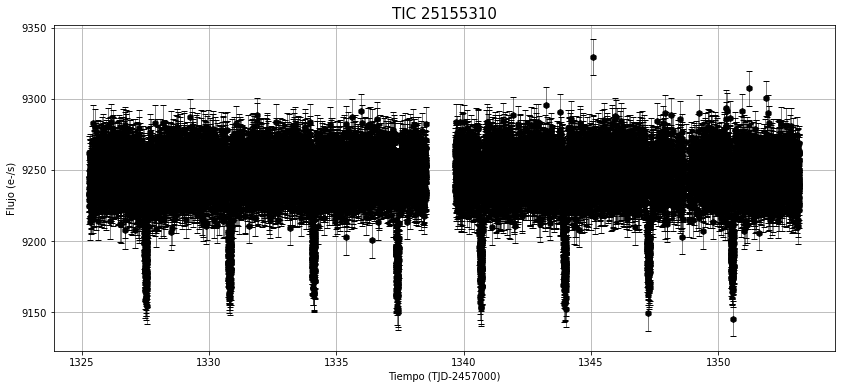

In [11]:
plt.figure(figsize = (14, 6))
plt.errorbar(df.TJD, df.FLUX, df.FLUX_ERROR,
             fmt = 'kh',
             capsize = 3,
             elinewidth = 0.5)

plt.xlabel('Tiempo (TJD-2457000)')
plt.ylabel('Flujo (e-/s)')
#plt.xlim(1330, 1332)
plt.title(objeto, size = 15)
plt.grid()
plt.show()

# Ingreso al catáglogo de VizieR para encontrar los datos estelares del objeto

In [12]:
catalogo = Vizier(columns = ['TIC', 
                             'Rad', 
                             'Mass'])
resultado = catalogo.query_object(objeto, 
                                  catalog = ['TIC'])
print(resultado)

TableList with 2 tables:
	'0:I/197A/tic' with 2 column(s) and 1 row(s) 
	'1:IV/38/tic' with 3 column(s) and 50 row(s) 


In [13]:
print(resultado[1]) #Elijo este catalogo ya que tiene las 3 columnas que estoy buscando

   TIC      Rad     Mass 
            Rsun    Msun 
--------- -------- ------
 25155318    0.729  0.970
684824304       --     --
684824305       --     --
684824309       --     --
684824310       --     --
684824311       --     --
684824312       --     --
684824375       --     --
684824377       --     --
684824385       --     --
      ...      ...    ...
 25155317    0.589  0.579
 25155313    1.013  0.670
684824537       --     --
684824538       --     --
684824540       --     --
684824541       --     --
684824539       --     --
684824542    0.539  0.770
684824547       --     --
684824545       --     --
Length = 50 rows


In [14]:
TIC, rad, mass = (resultado[1][14]['TIC'], 
                  resultado[1][14]['Rad'], 
                  resultado[1][14]['Mass'])
print(TIC, rad, mass)

25155310 1.242 1.01


# Determinación del periodo y el semieje mayor de la órbita 

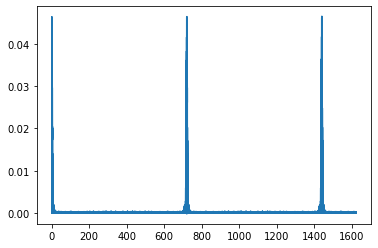

Finding optimal frequency:
 - Estimated peak width = 0.225
 - Using 5 steps per peak; omega_step = 0.0451
 - User-specified period range:  0.1 to 20
 - Computing periods at 1389 steps
Zooming-in on 5 candidate peaks:
 - Computing periods at 995 steps
El periodo orbital para TIC 25155310 es 3.287027973714094 días
El semieje mayor es de 0.04340927910003297 UA


In [15]:
time, flux = LombScargle(df.TJD, df.FLUX).autopower()

plt.plot(time, flux)
plt.show()

modelo = periodic.LombScargle(fit_period = True)
modelo.optimizer.period_range = (0.1,20)
modelo.fit(df.TJD, df.FLUX,)

#Obtención del periodo
P = modelo.best_period
print('El periodo orbital para', objeto, 'es', P, 'días')

M = mass # Masas solares
P1 = P/365.25 #Periodo en años 
a = ((P1**2)*(M))**(1/3) # Semi eje mayor en unidades astronómicas 
print ('El semieje mayor es de', a, 'UA')


# Graficación de los datos en fase

In [16]:
serie_temporal = TimeSeries.read(data, format = 'tess.fits')
#serie_temporal = TimeSeries.read(data, format = 'tess.fits')  

/Users/jorge/opt/anaconda3/lib/python3.8/site-packages/astropy/timeseries/io/kepler.py:77: UserWarning: Ignoring 815 rows with NaN times
  warnings.warn('Ignoring {} rows with NaN times'.format(np.sum(nans)))


In [17]:
periodograma = BoxLeastSquares.from_timeseries(serie_temporal, 'pdcsap_flux')  

In [18]:
rts = periodograma.autopower(0.2 * u.day)
mejor_rts = np.argmax(rts.power)  
tiempo_transito = rts.transit_time[mejor_rts]

In [19]:
serie_temporal_ajustada = serie_temporal.fold(period = P *u.day, 
                                              epoch_time = tiempo_transito)

In [20]:
mean, median, stddev = sigma_clipped_stats(serie_temporal_ajustada['pdcsap_flux'])  
serie_temporal_ajustada['pdcsap_flux_norm'] = serie_temporal_ajustada['pdcsap_flux'] / median  

In [21]:
serie_temporal_add = aggregate_downsample(serie_temporal_ajustada, time_bin_size=0.03 * u.day)  
print(serie_temporal_add)

   time_bin_start     time_bin_size    ...  pdcsap_flux_norm 
                            s          ...                   
------------------- ------------------ ... ------------------
-1.6435117934471712 2592.0000000000023 ... 1.0000941753387451
 -1.613511793447171 2591.9999999999977 ... 1.0000543594360352
-1.5835117934471712 2591.9999999999977 ... 0.9999791979789734
-1.5535117934471712 2592.0000000000023 ... 0.9999187588691711
-1.5235117934471711 2592.0000000000023 ...  1.000278353691101
 -1.493511793447171 2592.0000000000023 ... 1.0001102685928345
 -1.463511793447171 2591.9999999999927 ... 0.9999246001243591
-1.4335117934471713 2592.0000000000023 ... 1.0001850128173828
 -1.403511793447171 2592.0000000000023 ... 0.9999650120735168
-1.3735117934471712 2591.9999999999927 ... 0.9999248385429382
                ...                ... ...                ...
 1.3564882065528288 2592.0000000000023 ... 1.0000851154327393
  1.386488206552829 2591.9999999999977 ... 0.9999057650566101
 1.41648

/Users/jorge/opt/anaconda3/lib/python3.8/site-packages/astropy/timeseries/downsample.py:28: RuntimeWarning: Mean of empty slice
  result.append(function(array[indices[i]:indices[i+1]]))
/Users/jorge/opt/anaconda3/lib/python3.8/site-packages/astropy/timeseries/downsample.py:29: RuntimeWarning: Mean of empty slice
  result.append(function(array[indices[-1]:]))


In [22]:
ajuste1= serie_temporal_add.time_bin_start.jd
ajuste2 = serie_temporal_add['pdcsap_flux_norm']

In [23]:
ajuste1,ajuste2.min() #Para calcular el valor mínimo del ajuste

(array([-1.64351179, -1.61351179, -1.58351179, -1.55351179, -1.52351179,
        -1.49351179, -1.46351179, -1.43351179, -1.40351179, -1.37351179,
        -1.34351179, -1.31351179, -1.28351179, -1.25351179, -1.22351179,
        -1.19351179, -1.16351179, -1.13351179, -1.10351179, -1.07351179,
        -1.04351179, -1.01351179, -0.98351179, -0.95351179, -0.92351179,
        -0.89351179, -0.86351179, -0.83351179, -0.80351179, -0.77351179,
        -0.74351179, -0.71351179, -0.68351179, -0.65351179, -0.62351179,
        -0.59351179, -0.56351179, -0.53351179, -0.50351179, -0.47351179,
        -0.44351179, -0.41351179, -0.38351179, -0.35351179, -0.32351179,
        -0.29351179, -0.26351179, -0.23351179, -0.20351179, -0.17351179,
        -0.14351179, -0.11351179, -0.08351179, -0.05351179, -0.02351179,
         0.00648821,  0.03648821,  0.06648821,  0.09648821,  0.12648821,
         0.15648821,  0.18648821,  0.21648821,  0.24648821,  0.27648821,
         0.30648821,  0.33648821,  0.36648821,  0.3

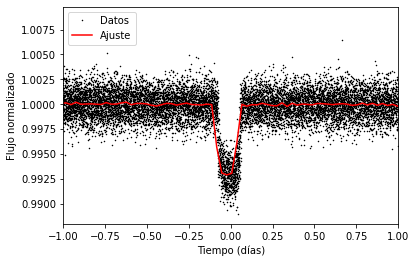

In [24]:
plt.plot(serie_temporal_ajustada.time.jd, serie_temporal_ajustada['pdcsap_flux_norm'], 
         'kh', markersize = 0.6)

plt.plot(ajuste1, ajuste2,'r', drawstyle='default') #Función ajustada (ROJO)
plt.xlabel('Tiempo (días)')
plt.xlim(-1,1)
#plt.ylim(0.990,1.0050)
plt.ylabel('Flujo normalizado')
plt.legend(('Datos', 'Ajuste'))
plt.show()

# DETERMINACIÓN DEL TAMAÑO DEL PLANETA

In [54]:
R_s = rad #Radio de la estrella en radios solares
pf = 1 - 0.99290717 #Profundidad del tránsito

#delta_f = 1 - 0.99290717 

R_j = 9.960378195133814 #Radios solares
R_p = R_s * (pf)**(1/2) * R_j #Radio del planeta en radios de júpiter
print('El el radio del planeta es de', R_p, 'Rj')

El el radio del planeta es de 1.041854807712574 Rj
